<div class="alert alert-info" role="alert">
    <center><h1 style="color:red;"><strong>Financial Economics 413 Lab #7a</strong></h1></center><br>
    <center><h2><strong><color:red>Capital Asset Pricing Model</h2></center></strong></h2></center><br>
</div>

## Lesson I: Data Import and Corrlation Analysis

Your first lesson is about examining the correlations between returns for several industry classifications.

#### Exercise I.1

Import the following packages:

>1. Pandas
>2. Numpy
>3. Statsmodels for *OLS*

In [3]:
##
## Enter package import code here
##
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf 
##
## set the graph "look & feel"
##
import seaborn as sns
sns.set()

#### Exercise I.2

Import the returns data in the *CSV* file (*capm.csv*).  The variables are:

| Variable   | Values    | Source  | Mnemonic |
|------------|-----------|---------|----------|
| Excess returns for an overall stock market index of the total market in the UK. Monthly, 10/80-9/00. | Percentages | DataStream (2000) | rendmark  |
| Excess returns on an index of 104 stocks in the cyclical consumer goods sector in the UK. Monthly, 10/80-9/00. | Percentages | IBID. | rendcyco |
| Excess returns on an index of 104 stocks in the noncyclical consumer goods sector in the UK. Monthly, 10/80-9/00. | Percentages | IBID. | rendncco |
| Excess returns on an index of 104 stocks in the information tech sector in the UK. Monthly, 10/80-9/00. | Percentages | IBID. | rendit |
| Excess returns on an index of 104 stocks in the telcom sector in the UK. Monthly, 10/80-9/00. | Percentages | IBID. | rendtel |

Put them into a DataFrame named *df*.  Set the index to be the *obs* variable for convenience.  Print the head of the DataFrame.


In [4]:
file = "capm.csv"
df = pd.read_csv( file )
##df.set_index( 'obs', inplace = True )
## Here is an extended import option
##
from datetime import datetime
df[ 'date' ] = pd.to_datetime( df.obs, format = "%YM%m" )
df.set_index( 'date', inplace = True )
display( df.head( ) )

,obs,rendcyco,rendit,rendmark,rendncco,rendtel
date,,,,,,
1980-10-01,1980M10,6.080229,-0.536649,7.263448,4.494436,10.963446
1980-11-01,1980M11,-0.924185,20.504933,6.339896,0.813929,3.403168
1980-12-01,1980M12,-3.286174,9.227533,-9.285217,-8.333878,-9.705065
1981-01-01,1981M01,5.211977,-0.902714,0.793291,0.615181,-0.265272
1981-02-01,1981M02,-16.164211,-0.838811,-2.902421,-5.102387,-9.005339


#### Exercise I.3

Create a correlation matrix of the five returns variables.  Interpret what you see.


In [5]:
df.corr()

/var/folders/dq/291nxlls6jd1gsfvb9j1f4680000gn/T/ipykernel_59374/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,rendcyco,rendit,rendmark,rendncco,rendtel
rendcyco,1.000000,0.320177,0.709563,0.586370,0.619123
rendit,0.320177,1.000000,0.397927,0.287297,0.461802
rendmark,0.709563,0.397927,1.000000,0.838869,0.810790
rendncco,0.586370,0.287297,0.838869,1.000000,0.637524
rendtel,0.619123,0.461802,0.810790,0.637524,1.000000


##  Lesson II: Data Visualization 


#### Exercise II.1

Create the box plots of each sector's excess returns and interpret the distributions.  Then plot each returns' series against the market returns.  These will be time series graphs.  Interpret each one.  Do the graphs make intuitive sense given the industry they represent?

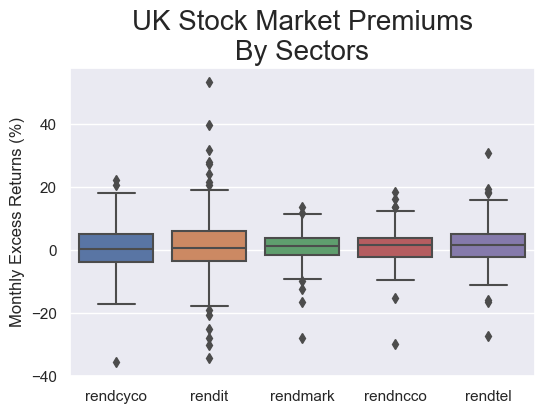

In [7]:
##
## plot the distributions
##
plt.figure(figsize = ( 6, 4 ) )
sns.set_style( "darkgrid" )
ax = sns.boxplot(data = df )
ax.set_title( 'UK Stock Market Premiums\nBy Sectors', fontsize = 20 )
ax.set_ylabel( 'Monthly Excess Returns (%)' );

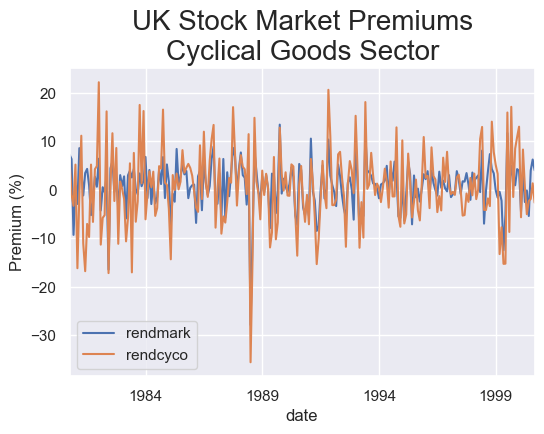

In [9]:
##
## cyclical goods returns
##
ax = df.plot( kind = 'line', y = ['rendmark', 'rendcyco'], figsize = [ 6, 4 ] )
ax.set_title( 'UK Stock Market Premiums\nCyclical Goods Sector', fontsize = 20)
ax.set_ylabel( 'Premium (%)');

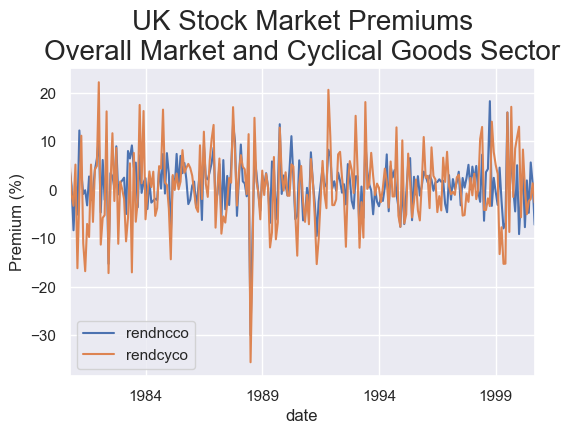

In [10]:
##
## non-cyclical goods returns
##
##
## cyclical goods returns
##
ax = df.plot( kind = 'line', y = ['rendncco', 'rendcyco'], figsize = [ 6, 4 ] )
ax.set_title( 'UK Stock Market Premiums\nOverall Market and Cyclical Goods Sector', fontsize = 20)
ax.set_ylabel( 'Premium (%)');

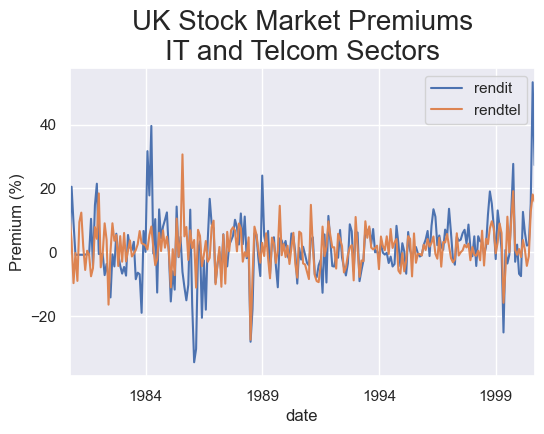

In [12]:
##
## telcomm returns
##
##
## cyclical goods returns
##
ax = df.plot( kind = 'line', y = [ 'rendit', 'rendtel' ], figsize = [ 6, 4 ] )
ax.set_title( 'UK Stock Market Premiums\nIT and Telcom Sectors', fontsize = 20)
ax.set_ylabel( 'Premium (%)');

Text(0.5, 1.0, 'UK Tech Stock Premiums')

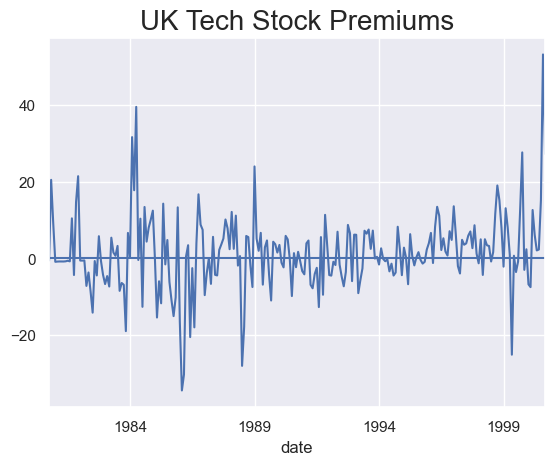

In [26]:
##
## Plot the IT data
##
ax = df.plot( y = 'rendit', legend = False );
ax.axhline( y = 0 ); 
ax.set_title( 'UK Tech Stock Premiums', fontsize = 20 )

Text(0.5, 1.0, 'UK Telecom Stock Premiums')

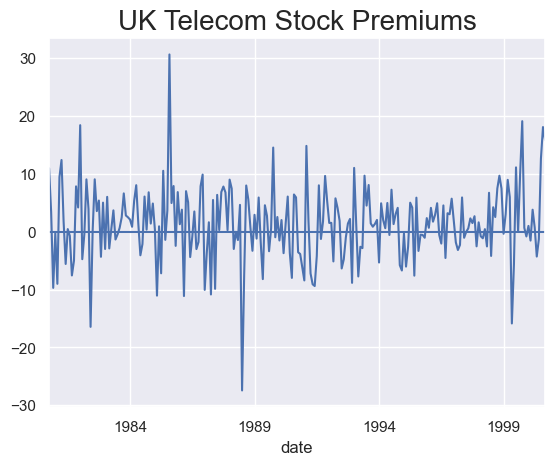

In [25]:
##
## Plot the Telecomm data
##
ax = df.plot( y = 'rendtel', legend = False );
ax.axhline( y = 0 );  ## draws horizontal reference line at 0
ax.set_title( 'UK Telecom Stock Premiums', fontsize = 20 )


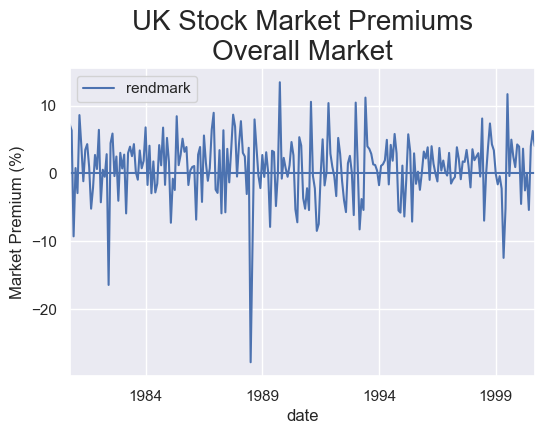

In [8]:
##
## market returns
##
ax = df.plot( kind = 'line', y = 'rendmark', figsize = [ 6, 4 ] )
ax.set_title( 'UK Stock Market Premiums\nOverall Market', fontsize = 20)
ax.set_ylabel( 'Market Premium (%)')
ax.axhline( y = 0 )
ax.axvline( pd.to_datetime( '1987-10-01' ), color='r', linestyle='--', lw=3 );

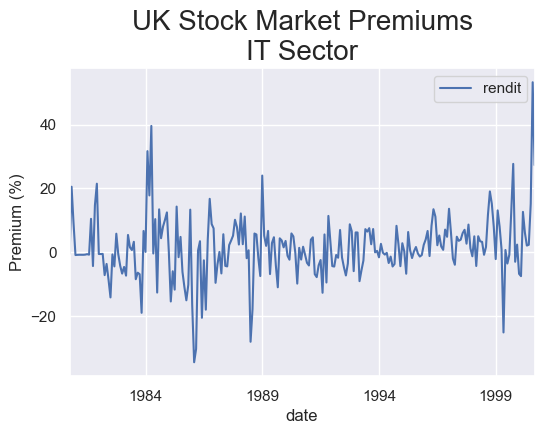

In [11]:
##
## it returns
##
##
## cyclical goods returns
##
ax = df.plot( kind = 'line', y = 'rendit', figsize = [ 6, 4 ] )
ax.set_title( 'UK Stock Market Premiums\nIT Sector', fontsize = 20)
ax.set_ylabel( 'Premium (%)');

Text(0.5, 1.0, 'UK Cyclical Stock Premiums')

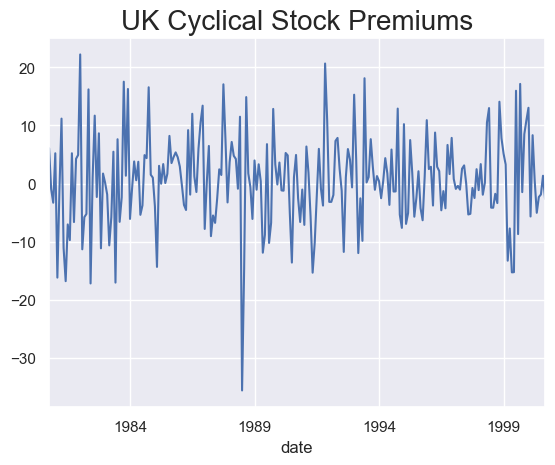

In [23]:
##
## Plot the Cyclical data
##
ax = df.plot( y = 'rendcyco', legend = False );
ax.set_title( 'UK Cyclical Stock Premiums', fontsize = 20 )

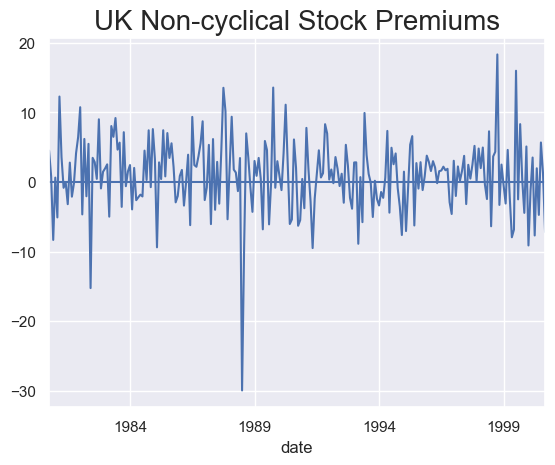

In [24]:
##
## Plot the Non-Cyclical data
##
ax = df.plot( y = 'rendncco', legend = False );
ax.set_title( 'UK Non-cyclical Stock Premiums', fontsize = 20 )
ax.axhline( y = 0 );

## Lesson III: Model Estimation

#### Exercise III.1

Regress each return series on the market data.  The model should be

> $Industry \sim rendmark$

where *Industry* is one of the four industries (i.e, cyclical, etc.) and *rendmark* is the market.

For each regression, test if the slope is equla to 1.0.  Use

> hypothesis = 'rendmark = 1'
>
> t_test = reg01.t_test( hypothesis )   ## Use reg01
>
> print( t_test )

Interpret the results.


In [12]:
##
## For Cyclical industry
##
formula = 'rendcyco ~ rendmark'
mod = smf.ols( formula, data = df )
reg01 = mod.fit( )  
display( reg01.summary() )

formula = 'rendit ~ rendmark'
mod = smf.ols( formula, data = df )
reg02 = mod.fit( )
display( reg02.summary() )

formula = 'rendtel ~ rendmark'
mod = smf.ols( formula, data = df )
reg03 = mod.fit( )   
display( reg03.summary() )

formula = 'rendncco ~ rendmark'
mod = smf.ols( formula, data = df )
reg04 = mod.fit( )   
display( reg04.summary() )


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rendcyco   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     241.3
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           4.75e-38
Time:                        17:05:26   Log-Likelihood:                -750.54
No. Observations:                 240   AIC:                             1505.
Df Residuals:                     238   BIC:                             1512.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4475      0.363     -1.233      0.219      -1.162       0.268
rendmark       1.1711      0.075     15.535      0.000       1.023       1.320
==============================================================================
Omnibus:                        9.928   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               14.058
Skew:                          -0.280   Prob(JB):                     0.000886
Kurtosis:                       4.045   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rendit   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     44.78
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           1.57e-10
Time:                        17:05:26   Log-Likelihood:                -867.91
No. Observations:                 240   AIC:                             1740.
Df Residuals:                     238   BIC:                             1747.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6612      0.592      1.117      0.265      -0.505       1.827
rendmark       0.8227      0.123      6.692      0.000       0.580       1.065
==============================================================================
Omnibus:                       64.546   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              377.148
Skew:                           0.897   Prob(JB):                     1.27e-82
Kurtosis:                       8.873   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                rendtel   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     456.6
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           2.79e-57
Time:                        17:05:26   Log-Likelihood:                -656.72
No. Observations:                 240   AIC:                             1317.
Df Residuals:                     238   BIC:                             1324.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4554      0.246      1.855      0.065      -0.028       0.939
rendmark       1.0897      0.051     21.369      0.000       0.989       1.190
==============================================================================
Omnibus:                      120.747   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.328
Skew:                           1.833   Prob(JB):                    2.86e-199
Kurtosis:                      11.832   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rendncco   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     565.2
Date:                Wed, 20 Dec 2023   Prob (F-statistic):           8.41e-65
Time:                        17:05:26   Log-Likelihood:                -593.48
No. Observations:                 240   AIC:                             1191.
Df Residuals:                     238   BIC:                             1198.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1979      0.189      1.049      0.295      -0.174       0.569
rendmark       0.9315      0.039     23.775      0.000       0.854       1.009
==============================================================================
Omnibus:                       26.385   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.123
Skew:                          -0.380   Prob(JB):                     5.41e-19
Kurtosis:                       5.799   Cond. No.                         4.89
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
##
## Test the slope
##
slope = reg01.params[ 1 ]
print( f'The slope is: {slope}' )
hypothesis = 'rendmark = 1'
t_test = reg01.t_test( hypothesis )   
print( t_test )

slope = reg02.params[ 1 ]
print( f'The slope is: {slope}' )
hypothesis = 'rendmark = 1'
t_test = reg02.t_test( hypothesis )   
print( t_test )

slope = reg03.params[ 1 ]
print( f'The slope is: {slope}' )
hypothesis = 'rendmark = 1'
t_test = reg03.t_test( hypothesis )
print( t_test )

slope = reg04.params[ 1 ]
print( f'The slope is: {slope}' )
hypothesis = 'rendmark = 1'
t_test = reg04.t_test( hypothesis )   
print( t_test )

The slope is: 1.1711283755824904
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.1711      0.075      2.270      0.024       1.023       1.320
The slope is: 0.8226505762918177
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             0.8227      0.123     -1.443      0.150       0.580       1.065
The slope is: 1.089697412571439
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0             1.0897      0.051 